<a href="https://colab.research.google.com/github/AsutoshDalei/Deep-Neural-Networks/blob/master/GoogleStockPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google's Stock Price Time Series Prediction
### Aim: Visualize and understand the rise in opening stock price of Google from year 2004 to 2019. Predict the prices form 2019 to the present day

Importing necessary packages and csv file into a dataframe

In [0]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

In [0]:
df=pd.read_csv(r'C:\Users\ndale\Downloads\GOOG.csv',parse_dates=True,index_col='Date')
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


Defining train data from 2004 till 2019 and test data from 2019 till 2020

In [0]:
traindata=(df.loc[:'2019-01-01',:]).drop('Adj Close',axis=1)
testdata=(df.loc['2019-01-01':,:]).drop('Adj Close',axis=1)
testdata.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1532600
2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1841100
2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,2093900
2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1981900
2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1764900


We scale the data and divide it into chunks of 60 days each, stored in xtrain.

By this, we train the model for 60 days and predict the 61st day, which is stored in ytrain

In [0]:
sca=MinMaxScaler()
scatraindata=sca.fit_transform(traindata)
scatestdata=sca.fit_transform(testdata)
scatraindata.shape

(3617, 5)

In [0]:
xtrain=[]
ytrain=[]
for i in range(len(scatraindata)-60):
    xtrain.append(scatraindata[i:i+60])
    #ytrain.append(scatraindata[i+60,0]) #We are considerng only the opening stock price. 
    ytrain.append(scatraindata[i+60]) #We can consider all of them as well

Is is necessary for the data to be in a numpy array format

In [0]:
xtrain,ytrain=np.array(xtrain),np.array(ytrain)

In [0]:
ytrain.shape
xtrain.shape

(3557, 60, 5)

## Model

This is a regression based model involving LSTM Recurrent Neural Networks for effective prediction of the future values


In [0]:
model=tf.keras.Sequential([
    tf.keras.layers.LSTM(units=50,activation='relu',return_sequences=True,input_shape=(xtrain.shape[1],5)),
    tf.keras.layers.Dropout(0.2), #Input Shape is (60,5)
    
    tf.keras.layers.LSTM(units=60,activation='relu',return_sequences=True),
    tf.keras.layers.Dropout(0.2), #This means 30% of the neurons in the neural network will be dropped it. 
    #This gives a getter generalization
    
    tf.keras.layers.LSTM(units=80,activation='relu',return_sequences=True),
    tf.keras.layers.Dropout(0.2),#Return Sequences indicate if we forward the input of the current layer 
    #to the next layer of not.
    #By this the inputs to the first layer is forwarded to the next layer
    
    tf.keras.layers.LSTM(units=120,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(units=5)
                          ])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 60, 50)            11200     
_________________________________________________________________
dropout_8 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 60, 60)            26640     
_________________________________________________________________
dropout_9 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 60, 80)            45120     
_________________________________________________________________
dropout_10 (Dropout)         (None, 60, 80)            0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 120)              

In [0]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
model.fit(xtrain,ytrain,epochs=10,batch_size=32)

Train on 3557 samples
Epoch 1/10
3557/3557 [==============================] - 23s 6ms/sample - loss: 0.0254 - accuracy: 0.2035
Epoch 2/10
3557/3557 [==============================] - 21s 6ms/sample - loss: 0.0037 - accuracy: 0.3405
Epoch 3/10
3557/3557 [==============================] - 23s 6ms/sample - loss: 0.0033 - accuracy: 0.3506
Epoch 4/10
3557/3557 [==============================] - 23s 6ms/sample - loss: 0.0029 - accuracy: 0.3582
Epoch 5/10
3557/3557 [==============================] - 23s 7ms/sample - loss: 0.0028 - accuracy: 0.3579
Epoch 6/10
3557/3557 [==============================] - 23s 7ms/sample - loss: 0.0024 - accuracy: 0.3708
Epoch 7/10
3557/3557 [==============================] - 24s 7ms/sample - loss: 0.0024 - accuracy: 0.3669
Epoch 8/10
3557/3557 [==============================] - 24s 7ms/sample - loss: 0.0022 - accuracy: 0.3742
Epoch 9/10
3557/3557 [==============================] - 24s 7ms/sample - loss: 0.0021 - accuracy: 0.3871
Epoch 10/10
3557/3557 [==========

Inorder to predict the 1st test value, we must have the values of the previous 60 days, i.e the last 60 days worth values form traindata. Hence we define a new dataframe combining the last 60 days worth values from train data and the entire test data

In [0]:
past60days=traindata.tail(60)
df1=past60days.append(testdata)
scatest=MinMaxScaler()
scadf1=scatest.fit_transform(df1)

Performing the same 60 days data chunk formation for test data as well and predicting it.

In [0]:
xtest=[]
ytest=[]
for i in range(60,scadf1.shape[0]):
    xtest.append(scadf1[i-60:i])
    ytest.append(scadf1[i])
xtest,ytest=np.array(xtest),np.array(ytest)
xtest.shape

(331, 60, 5)

In [0]:
ypred=model.predict(xtest)

In [0]:
#scatest.scale_
#isca=1/1.96656857e-03 #Scale on 'Open' column
#ypred=sca.inverse_transform(ypred)
#isca=1/sca.scale_[0]
#ypred*=isca
#ytest*=isca

Inverse transforming our newly obtained prediction data and converting it into a pandas dataframe format

In [0]:
ypredsca=scatest.inverse_transform(ypred)

In [0]:
ypreddf=pd.DataFrame(ypredsca)
ypreddf.columns=testdata.columns
ypreddf.index=testdata.index
ypreddf.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,1031.872437,1056.772827,1024.544800,1030.535889,1779678.375
2019-01-03,1030.506958,1055.461670,1023.175171,1029.295410,1788511.000
2019-01-04,1029.208130,1054.229736,1021.942139,1028.193359,1786694.375
2019-01-07,1028.041016,1053.141113,1020.902771,1027.267334,1775937.250
2019-01-08,1027.067017,1052.253296,1020.104187,1026.551880,1758244.250


## Visualization
We now visualize our predicted values with the true values

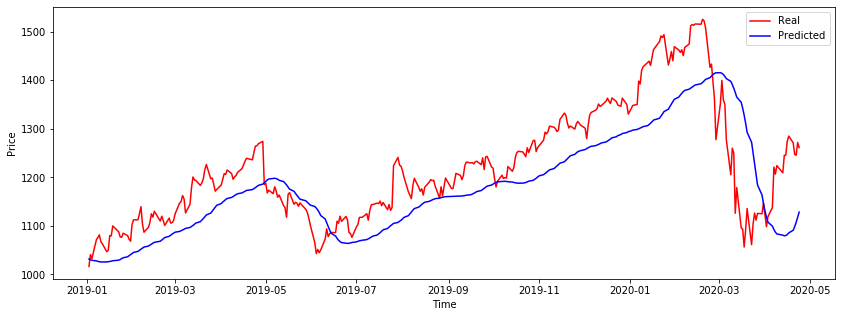

In [0]:
plt.figure(figsize=(14,5))
plt.plot(df.loc['2019-01-01':,:].Open,color='red',label='Real')
plt.plot(ypreddf['Open'],color='blue',label='Predicted')
#plt.title('Google Opening stock price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


We see that our model has predicted the future values quiet fairly and can be said to be dependable.

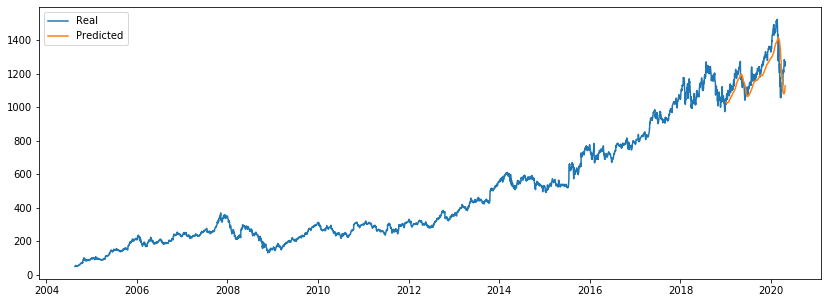

In [0]:
plt.figure(figsize=(14,5))
plt.plot(df.Open, label='Real')
plt.plot(ypreddf['Open'],label='Predicted')
plt.legend()
plt.show()